## 04 - Interpolation bonus material: Bézier curve widget example

In [1]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import ipywidgets as widgets

Bézier curves are parametric curves and the basic tool is the linear interpolation (`lerp`) between two points $a = (a_1,a_2)$ and $b = (b_1, b_2)$:
$$ \text{lerp}(a,b;t) = a + t(b - a), \ \text{for} \ t \in [0,1].$$

In [2]:
def lerp(a,b,t):
    # Linear interpolator
    return a + t*(b - a)

In [8]:
# Nodes
a = np.array((-1,0))
b = np.array((1,1))
c = np.array((0.2,0.1))
d = np.array((-0.5,0.5))


@widgets.interact(t=(0.,1.,0.01))
def plotBez1(t=0.):
    def label(ax, label, pos, color, xy=(0,10)):
        # Helper function for labeling
        ax.annotate(label, tuple(pos), color=color, textcoords="offset points", 
                xytext=xy, ha='center', size=14)
    
    ### First plot ###
    p = lerp(a,b,t)

    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    ax[0].plot((a[0], b[0]), (a[1], b[1]),
            lw=1., color='gray') # Final Bezier curve
    ax[0].plot((a[0], b[0]), (a[1], b[1]),
            lw=1., color='blue', linestyle=':', marker='*')
    # Tuple unpacking is used here: *tuple(p) = p[0], p[1]
    ax[0].plot(*tuple(p), lw=1, color='red', marker='o')
    ax[0].grid(True)
    ax[0].set_title("1st order Bézier 'curve'")
    label(ax[0], 'a', a, 'blue')
    label(ax[0], 'b', b, 'blue')
    label(ax[0], 'p(t)', p, 'red', (5,-15))

    ### Second plot ###
    p1 = lerp(a,c,t)
    p2 = lerp(c,b,t)
    p = lerp(p1,p2,t)

    ts = np.linspace(0,1,100)
    ps = np.array([lerp(lerp(a,c,t),lerp(c,b,t),t) for t in ts])

    ax[1].plot(ps[:,0],ps[:,1], lw=1., color='gray') # Final Bezier curve

    ax[1].plot((a[0], c[0], b[0]), (a[1], c[1], b[1]),
            lw=1., color='blue', linestyle=':', marker='*')
    ax[1].plot((p1[0], p2[0]), (p1[1], p2[1]),
            lw=1., color='red', linestyle=':', marker='*')
    ax[1].plot(*tuple(p), lw=1, color='red', marker='o', label='p')
    ax[1].grid(True)
    ax[1].set_title("2nd order Bézier curve")
    label(ax[1], 'a', a, 'blue')
    label(ax[1], 'b', b, 'blue')
    label(ax[1], 'c', c, 'blue')
    label(ax[1], 'p(t)', p, 'red', (5,-15))

    ### Third plot ###
    p1 = lerp(a,d,t)
    p2 = lerp(d,c,t)
    p3 = lerp(c,b,t)
    p12 = lerp(p1,p2,t)
    p23 = lerp(p2,p3,t)

    p = lerp(p12,p23,t)

    ts = np.linspace(0,1,100)
    ps = np.array([lerp(lerp(lerp(a,d,t),lerp(d,c,t),t),
                        lerp(lerp(d,c,t),lerp(c,b,t),t),t) for t in ts]) # This is getting complicated

    ax[2].plot(ps[:,0],ps[:,1], lw=1., color='gray') # Final Bezier curve

    ax[2].plot((a[0], d[0], c[0], b[0]), (a[1], d[1], c[1], b[1]),
            lw=1., color='blue', linestyle=':', marker='*')
    ax[2].plot((p1[0], p2[0]), (p1[1], p2[1]),
            lw=1., color='purple', linestyle=':', marker='*')
    ax[2].plot((p2[0], p3[0]), (p2[1], p3[1]),
            lw=1., color='purple', linestyle=':', marker='*')
    ax[2].plot((p12[0], p23[0]), (p12[1], p23[1]),
            lw=1., color='red', linestyle=':', marker='*')
    ax[2].plot(*tuple(p), lw=1, color='red', marker='o', label='p')
    ax[2].grid(True)
    ax[2].set_title("3rd order Bézier curve")
    label(ax[2], 'a', a, 'blue')
    label(ax[2], 'b', b, 'blue')
    label(ax[2], 'c', c, 'blue')
    label(ax[2], 'd', d, 'blue')
    label(ax[2], 'p(t)', p, 'red', (5,-15))

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

### Quadratic Bézier basis

Clearly higher order Bézier curves have a visually cool recursivity. Let's see a direct approach. Consider nodes $P_0, P_1$ and $P_2$, where $P_1$ is the middle point or *control point*. Start with the 1st order curves $B^1$ which are
\begin{aligned}
B^1_{01}(t) &= P_0 + t(P_1 - P_0) = (1-t)P_0 + tP_1, \\ 
B^1_{12}(t) &= P_1 + t(P_2 - P_1) = (1-t)P_1 + tP_2.
\end{aligned}
And the second order curve $B_{012}^2$ is then
\begin{aligned}
B_{012}^2(t) &= (1-t)B^1_{01}(t) + tB^1_{12}(t), \\
 &= (1-t)((1-t)P_0 + tP_1) + t((1-t)P_1 + tP_2), \\
 &= (1-t)^2 P_0 + 2t(t-1) P_1 + t^2 P_2.
\end{aligned}

So the quadratic curves are spanned by $(1-t)^2, 2t(1-t)$ and $t^2$.

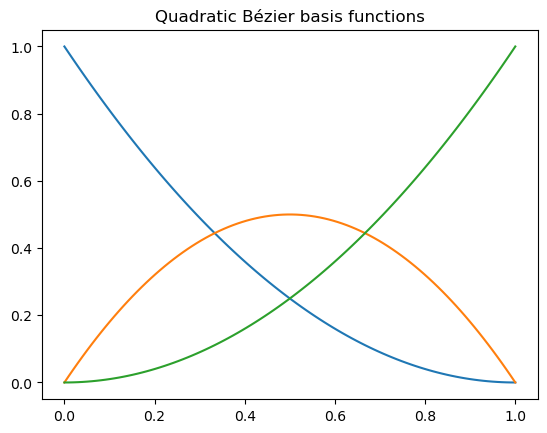

In [13]:
ts = np.linspace(0,1,100)

def B1(t):
    return (1-t)**2
def B2(t):
    return 2*t*(1-t)
def B3(t):
    return t**2

plt.plot(ts, B1(ts), ts, B2(ts), ts, B3(ts))
plt.title('Quadratic Bézier basis functions');